<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_150Hz_RandomForestClassifier_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Size_distribution_150Hz_RandomForestClassifier_SHAP

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
data = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_150Hz.csv',sep=';')

In [25]:
#!pip install shap

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.ensemble import RandomForestClassifier

In [27]:
# PREPROCESSING
def preprocessing(df):
    df = df.copy()
    df = df.drop(['Label',' '],axis=1)
    df.dropna(inplace=True)
    y = df['Group']
    X = df.drop('Group',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
    return X_train, X_test, y_train, y_test,scaler
X_train, X_test, y_train, y_test,scaler = preprocessing(data)

In [28]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
print('acc: ',round(model.score(X_test,y_test),4))

acc:  1.0


In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
model.classes_

array([0, 1])

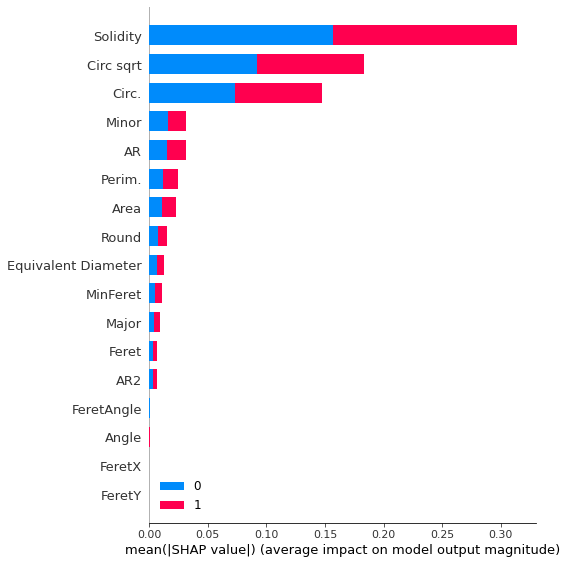

In [30]:
shap.summary_plot(shap_values,X_test,class_names=model.classes_)

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

1.0

In [34]:
confusion_matrix(y_test,y_pred)

array([[239,   0],
       [  0,  73]])

In [35]:
data_vis = X_test.copy()

In [36]:
data_vis=pd.DataFrame(scaler.inverse_transform(data_vis),columns=data_vis.columns)

In [37]:
data_vis['y_pred'] = y_pred

In [38]:
y_test

1496    1
168     0
353     0
468     0
1410    1
       ..
1523    1
58      0
1521    1
1034    0
1201    1
Name: Group, Length: 312, dtype: int64

In [39]:
data_vis['y_test'] = y_test.values

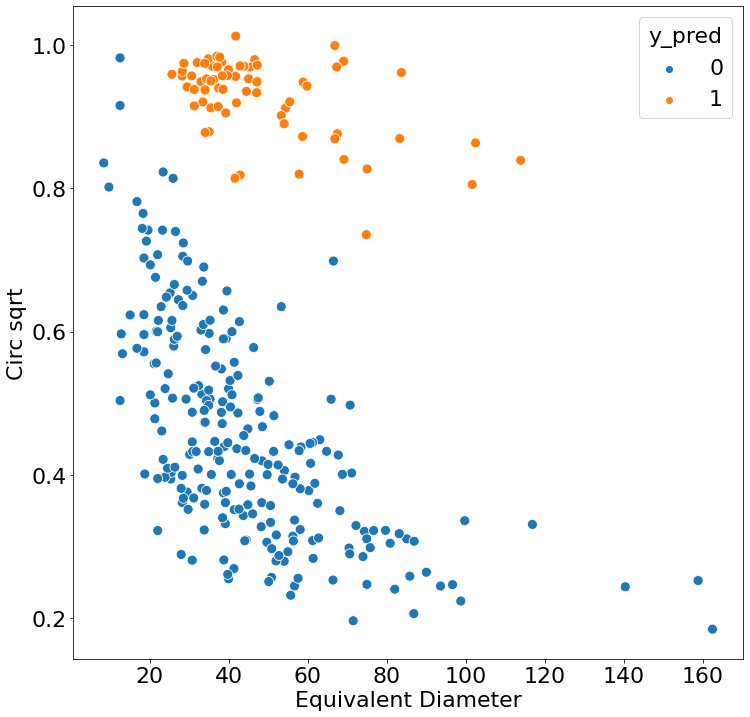

In [40]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 22})
sns.scatterplot(data=data_vis,
                y='Circ sqrt',
                x='Equivalent Diameter',
                hue='y_pred',
                s=100)
sns.scatterplot(data=data_vis[data_vis['y_pred'] != data_vis['y_test']],
                y='Circ sqrt',
                x='Equivalent Diameter',
                color='black',
                s=200,
                marker="x")